In [4]:
import numpy as np

def decomposicao_lu(A):
    """
    Realiza a decomposição LU de uma matriz A.
    Retorna as matrizes L e U tais que A = L * U.
    L é triangular inferior com diagonal principal = 1.
    U é triangular superior.
    """
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    
    # Inicializa a diagonal principal de L com 1's
    for i in range(n):
        L[i, i] = 1.0
    
    # Algoritmo de decomposição LU
    for k in range(n):
        # Calcula os elementos da linha k de U
        for j in range(k, n):
            soma = 0
            for s in range(k):
                soma += L[k, s] * U[s, j]
            U[k, j] = A[k, j] - soma
        
        # Calcula os elementos da coluna k de L
        for i in range(k+1, n):
            soma = 0
            for s in range(k):
                soma += L[i, s] * U[s, k]
            if abs(U[k, k]) < 1e-10:
                raise ValueError("Divisão por zero na decomposição LU. A matriz pode ser singular.")
            L[i, k] = (A[i, k] - soma) / U[k, k]
    
    return L, U

def resolver_sistema_lu(L, U, b):
    """
    Resolve o sistema L*U*x = b usando substituição progressiva e regressiva.
    Primeiro resolve L*y = b para y, depois U*x = y para x.
    """
    n = len(b)
    
    # Substituição progressiva para resolver L*y = b
    y = np.zeros(n)
    for i in range(n):
        soma = 0
        for j in range(i):
            soma += L[i, j] * y[j]
        y[i] = b[i] - soma
    
    # Substituição regressiva para resolver U*x = y
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        soma = 0
        for j in range(i+1, n):
            soma += U[i, j] * x[j]
        if abs(U[i, i]) < 1e-10:
            raise ValueError("Divisão por zero na substituição regressiva. A matriz U pode ser singular.")
        x[i] = (y[i] - soma) / U[i, i]
    
    return x

A = np.array([
    [8, -4, 0, 9, 0, 0],
    [-4, 11.5, -2.5, 0, -5, 0],
    [0, -2.5, 4.5, 0, 0, -2],
    [-1, 0, 0, 3, -2, 0],
    [0, -5, 0, -2, 8.5, -1.5],
    [0, 0, -2, 0, -1.5, 8]
], dtype=float)

# Vetor dos termos independentes
b = np.array([20, -12, 14, 8, -30, 0], dtype=float)


try:
    L, U = decomposicao_lu(A)
    
    print("\nMatriz L (triangular inferior):")
    print(L)
    
    print("\nMatriz U (triangular superior):")
    print(U)
    
    # Verificação da decomposição LU
    LU = np.dot(L, U)
    erro_max_LU = np.max(np.abs(LU - A))
    print("\nErro máximo na verificação L·U = A:", erro_max_LU)
    
    if erro_max_LU > 1e-10:
        print("ALERTA: A decomposição LU tem precisão limitada.")
    else:
        print("A decomposição LU tem boa precisão.")
    
    correntes = resolver_sistema_lu(L, U, b)
    
    print("\nSolução do sistema (correntes no circuito):")
    for i, corrente in enumerate(correntes):
        print(f"i{i+1} = {corrente:.6f} A")
    
    # Verificação da solução
    residuo = np.dot(A, correntes) - b
    erro_max_solucao = np.max(np.abs(residuo))
    print("\nErro máximo na verificação A·x = b:", erro_max_solucao)
    
    if erro_max_solucao > 1e-10:
        print("ALERTA: A solução tem precisão limitada.")
    else:
        print("A solução tem boa precisão.")
    
except ValueError as e:
    print(f"Erro: {e}")
    print("Não foi possível resolver o sistema usando decomposição LU.")



Matriz L (triangular inferior):
[[ 1.          0.          0.          0.          0.          0.        ]
 [-0.5         1.          0.          0.          0.          0.        ]
 [ 0.         -0.26315789  1.          0.          0.          0.        ]
 [-0.125      -0.05263158 -0.03424658  1.          0.          0.        ]
 [ 0.         -0.52631579 -0.34246575  0.17580708  1.          0.        ]
 [ 0.          0.         -0.52054795  0.14002334 -0.31968609  1.        ]]

Matriz U (triangular superior):
[[ 8.         -4.          0.          9.          0.          0.        ]
 [ 0.          9.5        -2.5         4.5        -5.          0.        ]
 [ 0.          0.          3.84210526  1.18421053 -1.31578947 -2.        ]
 [ 0.          0.          0.          4.40239726 -2.30821918 -0.06849315]
 [ 0.          0.          0.          0.          5.82360949 -2.17288993]
 [ 0.          0.          0.          0.          0.          6.27385206]]

Erro máximo na verificação L·U 

In [5]:
# Questão 1
import numpy as np

determinante = np.linalg.det(A)
print("\nDeterminante da matriz A:", determinante)

if abs(determinante) < 1e-10:
    print("ALERTA: A matriz A é praticamente singular e está próxima de zero.")

# 2. Cálculo do número de condicionamento
numero_condicionamento = np.linalg.cond(A)
print("\nNúmero de condicionamento da matriz A:", numero_condicionamento)

if numero_condicionamento > 1e4:
    print("ALERTA: O sistema é mal condicionado (número de condicionamento > 10⁴).")

# 3. Cálculo das normas
norma_infinito_A = np.linalg.norm(A, np.inf)
print("\nNorma infinito da matriz A:", norma_infinito_A)

try:
    A_inv = np.linalg.inv(A)
    norma_infinito_A_inv = np.linalg.norm(A_inv, np.inf)
    print("Norma infinito da inversa de A:", norma_infinito_A_inv)
    
    cond_usando_normas = norma_infinito_A * norma_infinito_A_inv
    print("Número de condicionamento (usando norma infinito):", cond_usando_normas)
    
    identidade_calculada = np.dot(A, A_inv)
    erro_max = np.max(np.abs(identidade_calculada - np.eye(6)))
    print("\nErro máximo na verificação A·A⁻¹ = I:", erro_max)
    
    if erro_max > 1e-10:
        print("ALERTA: A inversa calculada tem precisão limitada.")
except np.linalg.LinAlgError:
    print("Não foi possível calcular a inversa da matriz A.")


if abs(determinante) < 1e-10 or numero_condicionamento > 1e6:
    print("O sistema é INSTÁVEL")
elif numero_condicionamento > 1e4:
    print("O sistema tem ESTABILIDADE LIMITADA")
else:
    print("O sistema é ESTÁVEL.")



Determinante da matriz A: 46967.62499999999

Número de condicionamento da matriz A: 8.988548441366287

Norma infinito da matriz A: 23.0
Norma infinito da inversa de A: 0.7313814569078166
Número de condicionamento (usando norma infinito): 16.821773508879783

Erro máximo na verificação A·A⁻¹ = I: 2.7755575615628914e-16
O sistema é ESTÁVEL.


Equação da reta ajustada: y = 10.7039x + 3.7657


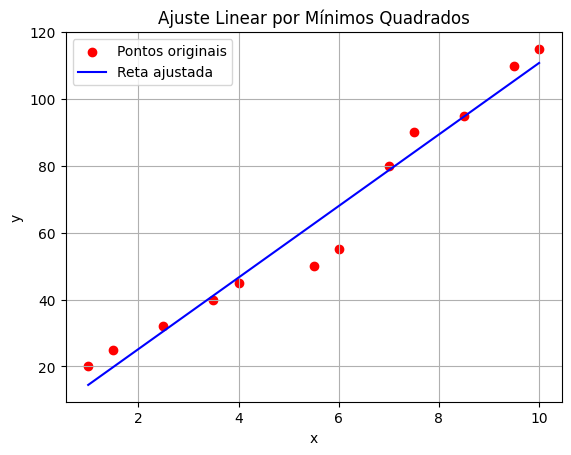

In [ ]:
# Questão 2


import matplotlib.pyplot as plt

def ajuste_linear_minimos_quadrados():
    # Pontos dados
    T = [
        (1, 20), (1.5, 25), (2.5, 32), (3.5, 40),
        (4.0, 45), (5.5, 50), (6.0, 55), (7.0, 80),
        (7.5, 90), (8.5, 95), (9.5, 110), (10, 115)
    ]

    # Inicialização das somas
    n = len(T)
    soma_x = soma_y = soma_x2 = soma_xy = 0

    # Cálculo das somas necessárias
    for x, y in T:
        soma_x += x
        soma_y += y
        soma_x2 += x * x
        soma_xy += x * y

    # Sistema linear:
    # a * soma_x2 + b * soma_x = soma_xy
    # a * soma_x + b * n = soma_y
    A = [
        [soma_x2, soma_x],
        [soma_x, n]
    ]
    B = [soma_xy, soma_y]

    # Eliminação de Gauss
    # Normalização da primeira linha
    pivot = A[0][0]
    A[0][0] /= pivot
    A[0][1] /= pivot
    B[0] /= pivot

    # Eliminação da primeira coluna na segunda linha
    factor = A[1][0]
    A[1][0] -= factor * A[0][0]
    A[1][1] -= factor * A[0][1]
    B[1] -= factor * B[0]

    # Normalização da segunda linha
    pivot = A[1][1]
    A[1][1] /= pivot
    B[1] /= pivot

    # Substituição reversa para encontrar os coeficientes
    b = B[1]
    a = B[0] - A[0][1] * b

    # Exibição da equação da reta ajustada
    print(f"Equação da reta ajustada: y = {a:.4f}x + {b:.4f}")

    # Plotando o gráfico
    xs = [x for x, y in T]
    ys = [y for x, y in T]
    reta_x = [min(xs), max(xs)]
    reta_y = [a * x + b for x in reta_x]

    plt.scatter(xs, ys, color='red', label='Pontos originais')
    plt.plot(reta_x, reta_y, color='blue', label='Reta ajustada')
    plt.title('Ajuste Linear por Mínimos Quadrados')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

# Chamada da função principal
ajuste_linear_minimos_quadrados()

A reta de melhor ajuste é:  y = 10.8503x + 2.7271


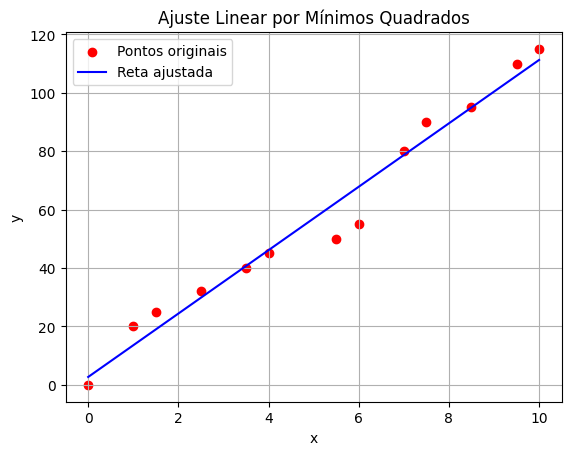

In [5]:
import copy
import matplotlib.pyplot as plt  

def gaussian_elimination(A, b, tol=1e-12):
    n = len(A)
    A = copy.deepcopy(A)
    b = copy.deepcopy(b)

    # Eliminação para triangular superior
    for k in range(n):
        pivot_row = max(range(k, n), key=lambda i: abs(A[i][k]))
        if abs(A[pivot_row][k]) < tol:
            raise ValueError(f"Pivô muito pequeno em coluna {k}: {A[pivot_row][k]:.3e}")
        if pivot_row != k:
            A[k], A[pivot_row] = A[pivot_row], A[k]
            b[k], b[pivot_row] = b[pivot_row], b[k]
        for i in range(k+1, n):
            factor = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] -= factor * A[k][j]
            b[i] -= factor * b[k]

    # Substituição reversa
    x = [0] * n
    for i in reversed(range(n)):
        s = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - s) / A[i][i]
    return x

if __name__ == "__main__":
    # 1) Dados do exercício
    pontos = [(0, 0), (1, 20), (1.5, 25), (2.5, 32), (3.5, 40),
        (4.0, 45), (5.5, 50), (6.0, 55), (7.0, 80),
        (7.5, 90), (8.5, 95), (9.5, 110), (10, 115)]

    # 2) Monta as somas para as equações normais
    n = len(pontos)
    Sx = Sy = Sxx = Sxy = 0.0
    for x, y in pontos:
        Sx  += x
        Sy  += y
        Sxx += x * x
        Sxy += x * y

    # 3) Constrói o sistema normal
    A = [
        [Sxx, Sx],
        [Sx,  n ]
    ]
    B = [Sxy, Sy]

    # 4) Resolve o sistema
    m, b0 = gaussian_elimination(A, B)
    print(f"A reta de melhor ajuste é:  y = {m:.4f}x + {b0:.4f}")

    # 5) Plota o gráfico corretamente
    xs = [x for x, y in pontos]
    ys = [y for x, y in pontos]

    # pontos originais
    plt.scatter(xs, ys, color='red', label='Pontos originais')

    # reta ajustada: pega o mínimo e máximo de x para desenhar a linha
    x_line = [min(xs), max(xs)]
    y_line = [m * xi + b0 for xi in x_line]
    plt.plot(x_line, y_line, color='blue', label='Reta ajustada')

    plt.title('Ajuste Linear por Mínimos Quadrados')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()




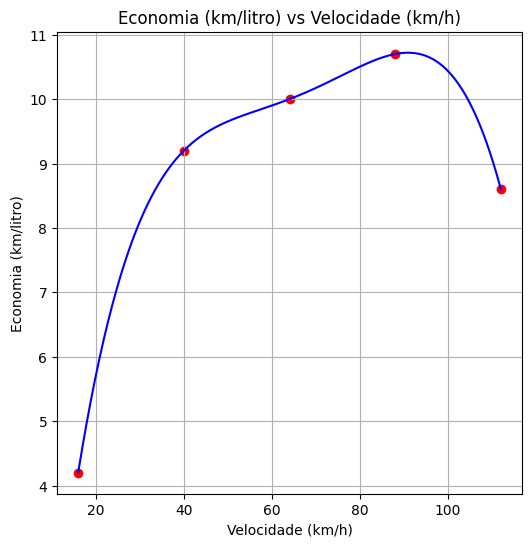

Economia de combustível a 105 km/h: 9.9314 km/l


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função que avalia o polinômio interpolador de Lagrange
def interpolL(x, T):
    Soma = 0
    for i in range(len(T)):
        produto = 1.0
        for j in range(len(T)):
            if j == i:
                continue
            produto = produto * (x - T[j][0]) / (T[i][0] - T[j][0])
        Soma = Soma + T[i][1] * produto
    return Soma

# Tabela de dados do exercício
T = [
    (16, 4.2),
    (40, 9.2),
    (64, 10.0),
    (88, 10.7),
    (112, 8.6)
]

# Definindo o polinômio interpolador
p = lambda x: interpolL(x, T)

# Valores de x para plotar o gráfico
x = np.linspace(16, 112, 500)

# Gráfico
plt.figure(figsize=(6, 6))
plt.plot(x, p(x), color='blue', linewidth=1.5)
plt.scatter(*zip(*T), color='red')  # Mostrar os pontos conhecidos
plt.title('Economia (km/litro) vs Velocidade (km/h)')
plt.xlabel('Velocidade (km/h)')
plt.ylabel('Economia (km/litro)')
plt.grid(True)
plt.show()

# Calculando a economia para 105 km/h
economia_105 = p(105)
print(f"Economia de combustível a 105 km/h: {economia_105:.4f} km/l")


In [15]:
import numpy as np

def derivative_lagrange(xi, yi, x0):
    """
    Calcula a derivada em x0 do polinômio de Lagrange que interpola
    os pares (xi, yi). xi e yi têm o mesmo comprimento m ≥ 2.
    """
    xi = np.array(xi)
    yi = np.array(yi)
    m = len(xi)
    deriv = 0.0

    for i in range(m):
        # calcula l_i'(x0), derivada da base de Lagrange i-ésima em x0
        li_prime = 0.0
        for j in range(m):
            if j == i:
                continue
            # contribuição do fator (x - xj)/(xi - xj) derivado em xi
            product = 1.0
            for k in range(m):
                if k == i or k == j:
                    continue
                product *= (x0 - xi[k]) / (xi[i] - xi[k])
            li_prime += product / (xi[i] - xi[j])
        deriv += yi[i] * li_prime

    return deriv


def finite_diff(x, fx, x0, m_points, scheme="auto"):
    """
    Aproxima f'(x0) usando m_points da lista (x, fx).
    
    Args:
      x, fx     : listas de mesmo tamanho N, espaçamento uniforme h = x[1]-x[0]
      x0         : ponto onde queremos a derivada (deve estar em x)
      m_points   : número de pontos a usar (2 ≤ m_points ≤ N)
      scheme     : "central", "progressiva", "regressiva"
    
    Retorna:
      Aproximação de f'(x0).
    """
    x = np.array(x)
    fx = np.array(fx)
    N = len(x)
    h = x[1] - x[0]

    # índice de x0
    try:
        idx = list(x).index(x0)
    except ValueError:
        raise ValueError("x0 não está na lista x.")

    if not (2 <= m_points <= N):
        raise ValueError("m_points deve satisfazer 2 ≤ m_points ≤ len(x).")

    # Escolha dos índices dos m_points
    if scheme == "progressiva":
        start = idx
        end   = idx + m_points
    elif scheme == "regressiva":
        end   = idx + 1
        start = end - m_points
    elif scheme == "central":
        half = m_points // 2
        start = idx - half
        end   = start + m_points
    else:
        raise ValueError("scheme deve ser 'progressiva', 'regressiva', 'central' ou 'auto'.")

    # Ajusta limites
    start = max(0, start)
    end   = min(N, end)
    if end - start < m_points:
        start = end - m_points

    xi = x[start:end]
    yi = fx[start:end]

    # Calcula derivada pelo polinômio de Lagrange nesses m_points
    return derivative_lagrange(xi, yi, x0)


if __name__ == "__main__":
    # Exemplo com o seu problema:
    x_vals = [0.398, 0.399, 0.400, 0.401, 0.402]
    f_vals = [0.408591, 0.409671, 0.410752, 0.411834, 0.412915]
    x0 = 0.399

    for m in [3]:
        for scheme in ["central"]:
            try:
                d = finite_diff(x_vals, f_vals, x0, m_points=m, scheme=scheme)
                print(f"m={m:>1}, esquema={scheme:8} → f'≈{d:.8f}")
                print()
            except Exception as e:
                print(f"m={m}, esquema={scheme:11} → erro: {e}")


m=3, esquema=central  → f'≈1.08050000



In [ ]:
import numpy as np

# Dados do enunciado
x = np.array([0.0, 0.1, 0.2])
fx = np.array([1.000, 0.995, 0.980])
h = 0.1

# Índice do ponto x0 = 0.1
i = 1
# Aproximação da 2ª derivada usando diferença central de ordem 2
fpp_approx = (fx[i-1] - 2*fx[i] + fx[i+1]) / h**2

print(f"Valor aproximado de f''(0.1): {fpp_approx:.4f}")

Valor aproximado de f''(0.1): -1.0000
